In [ ]:
pip install pathlib2

In [1]:
import torch
import numpy as np

from pathlib2 import Path

from tqdm.notebook import tqdm 
from src.data.dataloader import *

# DEBUG

In [ ]:
import os
import torch
import numpy as np
import torchvision.transforms as transforms

from PIL import Image
from torch.utils.data import BatchSampler
from torch.utils.data import Dataset, DataLoader
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
dataset_path = r'/work3/s212725/WasteProject/data'
anns_file_path = dataset_path + '/' + 'annotations.json'

# Read annotations
with open(anns_file_path, 'r') as f:
    print('Reading annotations file: ' + anns_file_path)
    annotations = json.load(f)
    categories = annotations['categories']
    images = annotations['images']
    anns = annotations['annotations']

Reading annotations file: /work3/s212725/WasteProject/data/annotations_0_train.json


In [5]:
print(anns[0])

{'id': 10, 'image_id': 4, 'category_id': 12, 'segmentation': [[1032.0, 1170.0, 1040.0, 1144.0, 1046.0, 1125.0, 1046.0, 1114.0, 1040.0, 1103.0, 1034.0, 1085.0, 1026.0, 1080.0, 1013.0, 1075.0, 1020.0, 1102.0, 1024.0, 1130.0, 1020.0, 1157.0, 1017.0, 1167.0, 1014.0, 1159.0, 1010.0, 1140.0, 1006.0, 1119.0, 997.0, 1096.0, 996.0, 1080.0, 988.0, 1067.0, 983.0, 1067.0, 974.0, 1062.0, 940.0, 1050.0, 870.0, 1022.0, 669.0, 944.0, 644.0, 949.0, 615.0, 955.0, 604.0, 952.0, 608.0, 957.0, 599.0, 973.0, 592.0, 979.0, 584.0, 982.0, 580.0, 985.0, 578.0, 989.0, 570.0, 1010.0, 563.0, 1026.0, 560.0, 1038.0, 556.0, 1061.0, 556.0, 1080.0, 564.0, 1092.0, 592.0, 1125.0, 686.0, 1167.0, 765.0, 1200.0, 935.0, 1271.0, 953.0, 1278.0, 978.0, 1280.0, 986.0, 1271.0, 997.0, 1249.0, 1012.0, 1223.0, 1007.0, 1202.0, 1003.0, 1192.0, 994.0, 1189.0, 996.0, 1181.0, 1002.0, 1177.0, 1007.0, 1179.0, 1011.0, 1183.0, 1018.0, 1186.0, 1022.0, 1193.0, 1032.0, 1170.0]], 'area': 93266.0, 'bbox': [556.0, 944.0, 490.0, 336.0], 'iscrowd': 

In [7]:
print(images[0]['id'])

377


In [35]:
def get_annotations(image_id):
        """Returns all annotations (bounding boxes and labels) for a given image_id."""
        image_annotations = []
        for ann in anns:
            if ann['image_id'] == image_id:
                bbox = ann['bbox']
                segmentation = ann['segmentation']
                area = ann['area']
                iscrowd = ann['iscrowd']
                image_annotations.append((bbox, segmentation, area, iscrowd))
        return image_annotations

In [36]:
annotations = get_annotations(image_id)

In [37]:
print(len(annotations))

1


In [38]:
annotations

[([1737.0, 1019.0, 1411.0, 781.0],
  [[1750,
    1301,
    1737,
    1401,
    1747,
    1522,
    1786,
    1627,
    1807,
    1647,
    1864,
    1737,
    1930,
    1744,
    2463,
    1773,
    2945,
    1800,
    2976,
    1732,
    2983,
    1616,
    3093,
    1511,
    3122,
    1530,
    3147,
    1522,
    3148,
    1077,
    3100,
    1100,
    2932,
    1019,
    2137,
    1033,
    2030,
    1039,
    1847,
    1083,
    1803,
    1167,
    1780,
    1193,
    1755,
    1241]],
  960169.0,
  0)]

In [47]:
print(anns[12])

{'id': 25, 'image_id': 10, 'category_id': 39, 'segmentation': [[920.0, 1086.0, 930.0, 1089.0, 936.0, 1096.0, 940.0, 1104.0, 941.0, 1107.0, 935.0, 1107.0, 926.0, 1107.0, 917.0, 1107.0, 910.0, 1109.0, 905.0, 1106.0, 904.0, 1101.0, 910.0, 1097.0, 912.0, 1092.0, 912.0, 1087.0, 912.0, 1083.0, 920.0, 1086.0]], 'area': 570.5, 'bbox': [904.0, 1083.0, 37.0, 26.0], 'iscrowd': 0}


In [6]:
print(anns[0]) # image_id = 4 # category_id': 12 - Drink can
print(anns[1]) # image_id = 4 # category_id': 10 - Food can

{'id': 10, 'image_id': 4, 'category_id': 12, 'segmentation': [[1032.0, 1170.0, 1040.0, 1144.0, 1046.0, 1125.0, 1046.0, 1114.0, 1040.0, 1103.0, 1034.0, 1085.0, 1026.0, 1080.0, 1013.0, 1075.0, 1020.0, 1102.0, 1024.0, 1130.0, 1020.0, 1157.0, 1017.0, 1167.0, 1014.0, 1159.0, 1010.0, 1140.0, 1006.0, 1119.0, 997.0, 1096.0, 996.0, 1080.0, 988.0, 1067.0, 983.0, 1067.0, 974.0, 1062.0, 940.0, 1050.0, 870.0, 1022.0, 669.0, 944.0, 644.0, 949.0, 615.0, 955.0, 604.0, 952.0, 608.0, 957.0, 599.0, 973.0, 592.0, 979.0, 584.0, 982.0, 580.0, 985.0, 578.0, 989.0, 570.0, 1010.0, 563.0, 1026.0, 560.0, 1038.0, 556.0, 1061.0, 556.0, 1080.0, 564.0, 1092.0, 592.0, 1125.0, 686.0, 1167.0, 765.0, 1200.0, 935.0, 1271.0, 953.0, 1278.0, 978.0, 1280.0, 986.0, 1271.0, 997.0, 1249.0, 1012.0, 1223.0, 1007.0, 1202.0, 1003.0, 1192.0, 994.0, 1189.0, 996.0, 1181.0, 1002.0, 1177.0, 1007.0, 1179.0, 1011.0, 1183.0, 1018.0, 1186.0, 1022.0, 1193.0, 1032.0, 1170.0]], 'area': 93266.0, 'bbox': [556.0, 944.0, 490.0, 336.0], 'iscrowd': 

In [38]:
category_names = {}
supercategory_names = []
category_ids = []
supercateogry_ids = []
supercategory_last_name = ''
supercategory_id_to_name = {}
nr_supercategories = 0

# Create a dictionary that maps supercategory names to IDs and store all supercategory names
for category in categories:
    category_names[category['id']] = category['name']
    supercategory_name = category['supercategory']
    if supercategory_name not in supercategory_names:
        supercategory_names.append(supercategory_name)
        supercategory_id_to_name[supercategory_name] = nr_supercategories
        nr_supercategories += 1

In [45]:
category_names = []
supercategory_names = []
supercategory_id_to_name = {}
nr_supercategories = 0

images_id_to_category_id = {}
ids = []
for i in range(len(anns)):
    image_id = anns[i]['image_id']
    category_id_img = anns[i]['category_id']
    if image_id not in ids:
        ids.append(image_id)
        images_id_to_category_id[image_id] = category_id_img

# category_id -> supercategory
category_id_to_supercategory = {}
for category in categories:
    category_id = category['id']
    supercategory_name = category['supercategory']
    category_id_to_supercategory[category_id] = supercategory_name

images_id_to_supercategory = {}    
for i in range(len(anns)):
    image_id = anns[i]['image_id']
    cat_id = images_id_to_category_id[image_id]
    super_cat = category_id_to_supercategory[cat_id]
    images_id_to_supercategory[image_id] = super_cat
    
# ex: {0: 'Bottle', 1: 'Carton', 2: 'Carton'...}

In [46]:
images_id_to_supercategory

{4: 'Can',
 5: 'Can',
 6: 'Can',
 9: 'Can',
 10: 'Bottle',
 12: 'Bottle',
 15: 'Bottle',
 16: 'Can',
 17: 'Cup',
 18: 'Can',
 19: 'Can',
 20: 'Can',
 22: 'Can',
 23: 'Can',
 24: 'Can',
 27: 'Bottle',
 28: 'Can',
 29: 'Can',
 30: 'Plastic container',
 31: 'Can',
 32: 'Can',
 33: 'Can',
 34: 'Can',
 35: 'Can',
 36: 'Bottle',
 37: 'Bottle',
 38: 'Plastic bag & wrapper',
 39: 'Bottle',
 40: 'Bottle',
 41: 'Can',
 42: 'Can',
 43: 'Bottle',
 44: 'Can',
 45: 'Can',
 46: 'Can',
 47: 'Lid',
 48: 'Carton',
 49: 'Carton',
 50: 'Straw',
 51: 'Can',
 53: 'Carton',
 54: 'Plastic bag & wrapper',
 55: 'Can',
 56: 'Cup',
 58: 'Paper bag',
 60: 'Bottle',
 62: 'Cup',
 64: 'Straw',
 68: 'Can',
 69: 'Squeezable tube',
 70: 'Carton',
 72: 'Plastic bag & wrapper',
 73: 'Plastic bag & wrapper',
 74: 'Plastic bag & wrapper',
 75: 'Can',
 76: 'Bottle',
 77: 'Plastic bag & wrapper',
 79: 'Cup',
 80: 'Straw',
 81: 'Carton',
 82: 'Blister pack',
 83: 'Plastic bag & wrapper',
 87: 'Plastic bag & wrapper',
 89: 'Car

# DATALOADER TEST - Data used for training: 70%

Dataloader working:

In [5]:
def collate_fn(batch):
        # Convert the batch of images and annotations to tensors
        images = []
        annotations = []
        for img, annotation in batch:
            images.append(img)
            annotations.append(annotation)
        images = torch.stack(images, dim=0)
        return images, annotations

In [6]:
from src.data.dataloader import *
import torchvision.datasets as datasets

# Define the transformation pipeline
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Instantiate the dataset and dataloader
dataset_train = TacoDataset(dataset_path = r'/work3/s212725/WasteProject/data', split_type = 'train', transform=transform)
taco_dataloader_train = DataLoader(dataset_train, batch_size=32, shuffle=True, collate_fn=collate_fn)

dataset_test = TacoDataset(dataset_path = r'/work3/s212725/WasteProject/data', split_type = 'test', transform=transform)
taco_dataloader_test = DataLoader(dataset_test, batch_size=32, shuffle=True, collate_fn=collate_fn)

dataset_val = TacoDataset(dataset_path = r'/work3/s212725/WasteProject/data', split_type = 'val', transform=transform)
taco_dataloader_val = DataLoader(dataset_val, batch_size=32, shuffle=True, collate_fn=collate_fn)

Reading annotations file: /work3/s212725/WasteProject/data/annotations_0_train.json
Reading annotations file: /work3/s212725/WasteProject/data/annotations_0_test.json
Reading annotations file: /work3/s212725/WasteProject/data/annotations_0_val.json


In [9]:
print(f"Length train dataset {len(dataset_train)}")
print(f"Length test dataset {len(dataset_test)}")
print(f"Length val dataset {len(dataset_val)}")

Length train dataset 1050
Length test dataset 225
Length val dataset 225


### The taco_dataloader object returned by DataLoader() can be used in a for loop to iterate over the data in batches. 

The len(taco_dataloader) is 33 because the dataloader is formed by 33 batches of 32 images, making 1056 images

In [11]:
print(len(taco_dataloader_train))

33


In [17]:
print(dataset_train.category_id_to_supercategory[0])

Aluminium foil


In [5]:
# Iterate over the batches
for batch_idx, (images, annotations) in enumerate(taco_dataloader_train):
    # Do something with the batch of images and annotations
    print('Batch:', batch_idx)
    print('Batch id: ', annotations[0]['image_id'])
    print('Images:', images.shape)
    print('Annotations:', annotations)

    # If you want to stop the loop after a certain number of batches, you can use a break statement
    if batch_idx == 3:
        break

Batch: 0
Batch id:  tensor([108])
Images: torch.Size([32, 3, 256, 256])
Annotations: [{'supercats': ['Plastic container', 'Unlabeled litter'], 'boxes': tensor([[1.5300e+02, 2.6210e+03, 2.3100e+02, 1.5300e+02],
        [2.0000e+00, 1.4600e+02, 1.7200e+02, 6.4000e+01]]), 'segmentations': tensor([  2., 193.,  51., 179.,  65., 159.,  84., 159., 114., 146., 174., 172.,
        174., 190., 123., 191.,  87., 208.,  33., 210.]), 'area': tensor([18442.5000,  5814.0000]), 'iscrowd': tensor([0, 0]), 'image_id': tensor([108])}, {'supercats': ['Aluminium foil'], 'boxes': tensor([[1052., 1800.,  227.,  237.]]), 'segmentations': tensor([1127., 1890., 1085., 1944., 1073., 1966., 1059., 1994., 1052., 2015.,
        1087., 2027., 1124., 2037., 1158., 2003., 1195., 1964., 1221., 1952.,
        1260., 1921., 1271., 1899., 1279., 1884., 1265., 1880., 1265., 1842.,
        1273., 1833., 1267., 1815., 1250., 1810., 1231., 1800., 1211., 1803.,
        1198., 1816., 1175., 1833., 1149., 1855., 1140., 1880., 11

Batch: 1
Batch id:  tensor([911])
Images: torch.Size([32, 3, 256, 256])
Annotations: [{'supercats': ['Cup'], 'boxes': tensor([[1163., 2064.,  373.,  488.]]), 'segmentations': tensor([1521., 2128., 1499., 2180., 1480., 2228., 1462., 2277., 1444., 2309.,
        1409., 2318., 1367., 2321., 1346., 2343., 1339., 2373., 1334., 2403.,
        1332., 2434., 1317., 2472., 1296., 2522., 1280., 2552., 1240., 2528.,
        1208., 2500., 1229., 2354., 1170., 2313., 1163., 2267., 1170., 2234.,
        1182., 2202., 1186., 2199., 1207., 2212., 1228., 2222., 1253., 2234.,
        1268., 2243., 1316., 2261., 1343., 2279., 1348., 2239., 1356., 2200.,
        1367., 2146., 1374., 2101., 1372., 2083., 1408., 2089., 1415., 2083.,
        1415., 2083., 1421., 2067., 1431., 2064., 1450., 2066., 1473., 2075.,
        1501., 2086., 1516., 2094., 1519., 2099., 1514., 2100., 1510., 2109.,
        1525., 2111., 1534., 2113., 1536., 2116., 1527., 2117., 1521., 2128.]), 'area': tensor([70258.]), 'iscrowd': tensor

Batch: 2
Batch id:  tensor([1061])
Images: torch.Size([32, 3, 256, 256])
Annotations: [{'supercats': ['Can'], 'boxes': tensor([[1067., 1422.,  324.,  372.]]), 'segmentations': tensor([1090., 1601., 1161., 1794., 1374., 1755., 1383., 1742., 1391., 1720.,
        1378., 1691., 1370., 1669., 1332., 1574., 1280., 1450., 1271., 1438.,
        1246., 1427., 1223., 1422., 1192., 1422., 1161., 1429., 1120., 1450.,
        1096., 1468., 1078., 1489., 1067., 1516., 1069., 1538., 1090., 1601.]), 'area': tensor([81216.]), 'iscrowd': tensor([0]), 'image_id': tensor([1061])}, {'supercats': ['Bottle cap', 'Bottle cap', 'Cup', 'Cup', 'Cup', 'Bottle', 'Plastic bag & wrapper', 'Straw', 'Lid', 'Cigarette'], 'boxes': tensor([[2337., 1587.,   31.,   64.],
        [1567., 1516.,   47.,   53.],
        [1826., 1485.,  212.,  157.],
        [ 777., 1474.,  198.,  243.],
        [ 996., 1550.,  184.,  208.],
        [1772., 1345.,  321.,  163.],
        [1589., 1353.,  267.,  342.],
        [ 474., 1444.,  119

Batch: 3
Batch id:  tensor([991])
Images: torch.Size([32, 3, 256, 256])
Annotations: [{'supercats': ['Straw'], 'boxes': tensor([[1305., 1597.,  523.,  113.]]), 'segmentations': tensor([1305., 1607., 1308., 1614., 1404., 1692., 1430., 1696., 1828., 1710.,
        1827., 1695., 1420., 1679., 1315., 1597., 1305., 1607.]), 'area': tensor([9036.]), 'iscrowd': tensor([0]), 'image_id': tensor([991])}, {'supercats': ['Straw', 'Carton'], 'boxes': tensor([[1862.,  759.,   41.,   65.],
        [1511.,  738.,  371.,  250.]]), 'segmentations': tensor([1550.,  978., 1522.,  916., 1518.,  913., 1516.,  898., 1514.,  843.,
        1511.,  832., 1620.,  800., 1816.,  743., 1833.,  738., 1839.,  745.,
        1848.,  765., 1857.,  789., 1863.,  805., 1873.,  836., 1880.,  875.,
        1882.,  901., 1877.,  902., 1867.,  903., 1809.,  920., 1803.,  904.,
        1796.,  890., 1787.,  877., 1772.,  864., 1767.,  860., 1768.,  869.,
        1775.,  889., 1782.,  919., 1785.,  926., 1754.,  934., 1749.,  9

## Code to show picture based on image ID

In [10]:
import os
import torch
import numpy as np
import torchvision.transforms as transforms

from PIL import Image
from torch.utils.data import BatchSampler
from torch.utils.data import Dataset, DataLoader
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

dataset_path = r'/work3/s212725/WasteProject/data'
anns_file_path = dataset_path + '/' + 'annotations_0_train.json'

# Read annotations
with open(anns_file_path, 'r') as f:
    print('Reading annotations file: ' + anns_file_path)
    annotations = json.load(f)
    categories = annotations['categories']
    images = annotations['images']
    anns = annotations['annotations']
    

Reading annotations file: /work3/s212725/WasteProject/data/annotations_0_train.json


/work3/s212725/WasteProject/data/batch_15/000049.jpg


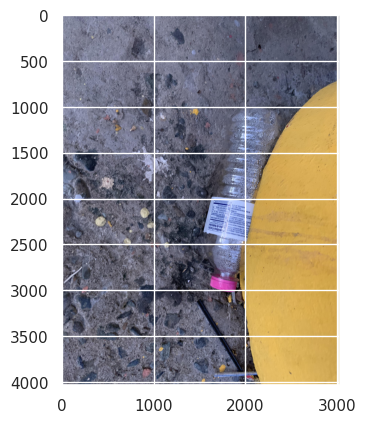

In [21]:
#/work3/s212725/WasteProject/data/batch_10/000007.jpg
num = 650
for i in range(len(images)):
    if images[i]['id'] == num:
        image_path = dataset_path + '/' + images[i]['file_name']
        print(image_path)
        #img = np.asarray(Image.open(image_path))
        image = Image.open(image_path).convert('RGB')
        plt.imshow(image)

# Implementation Selective Search Algorithm

In [30]:
# import the necessary packages
import argparse
import random
import time
import cv2
# construct the argument parser and parse the arguments

# load the input image
image = cv2.imread(r'/work3/s212725/WasteProject/data/batch_15/000049.jpg')
# initialize OpenCV's selective search implementation and set the
# input image
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
ss.setBaseImage(image)
ss.switchToSelectiveSearchFast()
# run selective search on the input image
start = time.time()
rects = ss.process()
end = time.time()
# show how along selective search took to run along with the total
# number of returned region proposals
print("[INFO] selective search took {:.4f} seconds".format(end - start))
print("[INFO] {} total region proposals".format(len(rects)))

AttributeError: module 'cv2' has no attribute 'ximgproc'

In [2]:
pip install selectivesearch

  Preparing metadata (setup.py) ... done
Using legacy 'setup.py install' for selectivesearch, since package 'wheel' is not installed.
  Running setup.py install for selectivesearch ... done

[notice] A new release of pip available: 22.2.2 -> 23.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage import io
from skimage.segmentation import felzenszwalb
from skimage.util import img_as_ubyte
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from matplotlib import patches
import selectivesearch

dataset_path = r'/work3/s212725/WasteProject/data'
anns_file_path = dataset_path + '/' + 'annotations.json'

# Read annotations
with open(anns_file_path, 'r') as f:
    print('Reading annotations file: ' + anns_file_path)
    images = annotations['images']

In [ ]:
for i in range(len(images)):
    img_path = images[i]['image_path']
    

In [ ]:
print(images[0])

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage import io
from skimage.segmentation import felzenszwalb
from skimage.util import img_as_ubyte
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from matplotlib import patches
import selectivesearch

# Set the path to the dataset
dataset_path = r'/work3/s212725/WasteProject/data'

for i in range(len(dataset_train.images)):
    image_path = dataset_path + '/' + dataset_train.images[i]['file_name']
    print(image_path)
    image = io.imread(image_path)
    # Extract object proposals using Selective Search
    proposals = selectivesearch.selective_search(image, scale=500, sigma=0.9, min_size=10)

    # Display the image and proposals
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
    ax.imshow(image)
    if i == 1:
        break

/work3/s212725/WasteProject/data/batch_12/000076.jpg


/zhome/7a/d/164695/venvs/P1_classification_dlcv/lib/python3.10/site-packages/skimage/feature/texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


# Evaluating script

In [ ]:
import os
import torch
import numpy as np
import skimage.io
import selective_search
from PIL import Image
import json
from src.data.dataloader import *
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import cv2

# Define the transformation pipeline
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

# Instantiate the dataset and dataloader
dataset_train = TacoDataset(dataset_path = r'/work3/s212725/WasteProject/data', split_type = 'train', transform=transform)

# Define the path to the folder where you want to save/get the images
save_folder = '/work3/s212725/WasteProject/processed_images/'
dataset_path = r'/work3/s212725/WasteProject/data'

for i in range(len(dataset_train.images)):
    image_path = dataset_path + '/' + dataset_train.images[i]['file_name']

    # Load image as NumPy array from image files
    image = skimage.io.imread(image_path)
    image = image.astype('uint8')
    print(image.shape())
    boxes = selective_search.selective_search(image, mode='fast')
    boxes_filter = selective_search.box_filter(boxes, min_size=20, topN=80)
    break
    
    
print("All images have been processed.")

In [ ]:
# Run selective search using single mode
    boxes = selective_search(image, mode='single', random_sort=False)
    boxes_filter = selective_search.box_filter(boxes, min_size=20, topN=80)
    # drawing rectangles on the original image
    # Add boxes to image and save new image
    for x1, y1, x2, y2 in boxes_filter:
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        
    
    break